<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab 1.06: Statistical Modeling and Model Validation

> Authors: Tim Book, Matt Brems

---

## Objective
The goal of this lab is to guide you through the modeling workflow to produce the best model you can. In this lesson, you will follow all best practices when slicing your data and validating your model. 

### Imports

In [1]:
# Import everything you need here.
# You may want to return to this cell to import more things later in the lab.
# DO NOT COPY AND PASTE FROM OUR CLASS SLIDES!
# Muscle memory is important!

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Read Data
The `citibike` dataset consists of Citi Bike ridership data for over 224,000 rides in February 2014.

In [2]:
# the dataset is contained in the `data` folder
df = pd.read_csv('/Users/seydoutoure/Desktop/ga_dsi/lab-1.06-model-validation/data/citibike_feb2014.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1


### Explore the data
Use this space to familiarize yourself with the data.

Convince yourself there are no issues with the data. If you find any issues, clean them here.

In [3]:
df.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224736 entries, 0 to 224735
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             224736 non-null  int64  
 1   starttime                224736 non-null  object 
 2   stoptime                 224736 non-null  object 
 3   start station id         224736 non-null  int64  
 4   start station name       224736 non-null  object 
 5   start station latitude   224736 non-null  float64
 6   start station longitude  224736 non-null  float64
 7   end station id           224736 non-null  int64  
 8   end station name         224736 non-null  object 
 9   end station latitude     224736 non-null  float64
 10  end station longitude    224736 non-null  float64
 11  bikeid                   224736 non-null  int64  
 12  usertype                 224736 non-null  object 
 13  birth year               224736 non-null  object 
 14  gend

-----

### What numeric columns shouldn't be treated as numeric?

**Answer:**

start station id, end station id, bikeid, gender

### Dummify the `start station id` variable

In [5]:
dummies_df = pd.get_dummies(data = df, columns=['start station id'])
dummies_df.head()

,tripduration,starttime,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,...,start station id_2006,start station id_2008,start station id_2009,start station id_2010,start station id_2012,start station id_2017,start station id_2021,start station id_2022,start station id_2023,start station id_3002
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,...,False,False,False,False,False,False,False,False,False,False
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,...,False,False,False,False,False,False,False,False,False,False
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,...,False,False,False,False,False,False,False,False,False,False
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,...,False,False,False,False,False,False,False,False,False,False
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,...,False,False,False,False,False,False,False,False,False,False


### Engineer a feature called `age` that shares how old the person would have been in 2014 (at the time the data was collected).

- Note: you will need to clean the data to do this.

In [6]:
dummies_df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station name',
       'start station latitude', 'start station longitude', 'end station id',
       'end station name', 'end station latitude', 'end station longitude',
       ...
       'start station id_2006', 'start station id_2008',
       'start station id_2009', 'start station id_2010',
       'start station id_2012', 'start station id_2017',
       'start station id_2021', 'start station id_2022',
       'start station id_2023', 'start station id_3002'],
      dtype='object', length=343)

In [7]:
df['birth year'].replace('\\N', pd.NA, inplace=True)

In [8]:
dummies_df['birth year'].replace('\\N', pd.NA, inplace=True)

In [9]:
print(dummies_df['birth year'].unique())

['1991' '1979' '1948' '1981' '1990' '1978' '1944' '1983' '1969' '1986'
 '1962' '1965' '1942' '1989' '1980' '1957' '1951' '1992' '1971' '1982'
 '1968' '1984' <NA> '1956' '1987' '1985' '1996' '1975' '1988' '1974'
 '1972' '1959' '1973' '1977' '1976' '1953' '1993' '1970' '1963' '1967'
 '1966' '1960' '1961' '1994' '1958' '1955' '1946' '1964' '1900' '1995'
 '1954' '1952' '1949' '1947' '1941' '1938' '1950' '1945' '1997' '1934'
 '1940' '1939' '1936' '1943' '1935' '1937' '1922' '1932' '1907' '1926'
 '1899' '1901' '1917' '1910' '1933' '1921' '1927' '1913']


In [10]:
print(dummies_df['birth year'].unique())

['1991' '1979' '1948' '1981' '1990' '1978' '1944' '1983' '1969' '1986'
 '1962' '1965' '1942' '1989' '1980' '1957' '1951' '1992' '1971' '1982'
 '1968' '1984' <NA> '1956' '1987' '1985' '1996' '1975' '1988' '1974'
 '1972' '1959' '1973' '1977' '1976' '1953' '1993' '1970' '1963' '1967'
 '1966' '1960' '1961' '1994' '1958' '1955' '1946' '1964' '1900' '1995'
 '1954' '1952' '1949' '1947' '1941' '1938' '1950' '1945' '1997' '1934'
 '1940' '1939' '1936' '1943' '1935' '1937' '1922' '1932' '1907' '1926'
 '1899' '1901' '1917' '1910' '1933' '1921' '1927' '1913']


In [11]:
df['birth year'].dropna()

0         1991
1         1979
2         1948
3         1981
4         1990
          ... 
224731    1976
224732    1985
224733    1968
224734    1982
224735    1960
Name: birth year, Length: 218019, dtype: object

In [12]:
dummies_df.dropna(subset='birth year', inplace=True)

In [13]:
print(dummies_df['birth year'].unique())

['1991' '1979' '1948' '1981' '1990' '1978' '1944' '1983' '1969' '1986'
 '1962' '1965' '1942' '1989' '1980' '1957' '1951' '1992' '1971' '1982'
 '1968' '1984' '1956' '1987' '1985' '1996' '1975' '1988' '1974' '1972'
 '1959' '1973' '1977' '1976' '1953' '1993' '1970' '1963' '1967' '1966'
 '1960' '1961' '1994' '1958' '1955' '1946' '1964' '1900' '1995' '1954'
 '1952' '1949' '1947' '1941' '1938' '1950' '1945' '1997' '1934' '1940'
 '1939' '1936' '1943' '1935' '1937' '1922' '1932' '1907' '1926' '1899'
 '1901' '1917' '1910' '1933' '1921' '1927' '1913']


In [14]:
# Rechecking and ensuring all values in 'birth year' are numeric
df['birth year'].dtype

dtype('O')

In [15]:
pd.to_numeric(df['birth year'])

0         1991.0
1         1979.0
2         1948.0
3         1981.0
4         1990.0
           ...  
224731    1976.0
224732    1985.0
224733    1968.0
224734    1982.0
224735    1960.0
Name: birth year, Length: 224736, dtype: float64

In [16]:
# Ensuring 'birth year' is now in a numeric format (integer)
dummies_df['birth year'] = dummies_df['birth year'].astype(int)


In [17]:
# Calculating age in 2014
dummies_df['age'] = 2014 - dummies_df['birth year']


In [18]:
# Displaying the first few rows of the DataFrame to verify the new 'age' column
dummies_df[['birth year', 'age']].head()


,birth year,age
0,1991,23
1,1979,35
2,1948,66
3,1981,33
4,1990,24


### Split your data into train and test sets

Look at the size of your data. What is a good proportion for your split? Justify your answer.

Use the `tripduration` column as your `y` variable.

For your `X` variables, use `age`, `usertype`, `gender`, and the dummy variables you created from `start station id`.

**NOTE:** When doing your train/test split, please use random seed 123.

In [19]:
# Selecting the predictor variables (X) and the target variable (y)
X = dummies_df[['age', 'usertype', 'gender']].join(dummies_df.filter(like='station_id_'))
y = dummies_df['tripduration']

In [20]:
# Converting 'usertype' to a binary variable (1 for Subscriber, 0 for Customer)
X['usertype'] = X['usertype'].map({'Subscriber': 1, 'Customer': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

### Fit a linear regression model in `sklearn` predicting `tripduration`

In [21]:
# Creating the Linear Regression model
lr = LinearRegression()

# Fitting the model with the training data
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
lr.intercept_

446.39228732525083

In [23]:
lr.coef_

array([  5.10054566,   0.        , 177.64720307])

In [24]:
# Predicting on the test set
y_pred = lr.predict(X_test)
y_pred

array([782.15640589, 787.25695155, 959.80360897, ..., 964.90415463,
       879.06677345, 807.6591342 ])

### Evaluate your model

Look at some evaluation metrics for **both** the training and test data. 
- How did your model do? Is it overfit, underfit, or neither?
- Does this model outperform the baseline? (e.g. setting $\hat{y}$ to be the mean of our training `y` values.)

In [25]:
# Predicting on the training and testing sets
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculating R-squared for training and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculating Mean Absolute Error (MAE) for training and test data
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Baseline Model: setting y_pred_baseline to be the mean of our training y values
y_pred_baseline = np.full_like(y_test, y_train.mean())

# Evaluating the baseline model using Mean Squared Error
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mse_baseline)

# Print the evaluation metrics
print(f"Training R^2: {r2_train}")
print(f"Test R^2: {r2_test}")
print(f"Training MAE: {mae_train}")
print(f"Test MAE: {mae_test}")
print(f"Baseline MSE: {mse_baseline}")
print(f"Baseline RMSE: {rmse_baseline}")


Training R^2: 0.00027062814282141634
Test R^2: 0.0001934735308711799
Training MAE: 599.9087065284401
Test MAE: 574.2911709391333
Baseline MSE: 32330180.831776902
Baseline RMSE: 5685.963491949004


The model is neither overfit nor underfit in the traditional sense, as both training and test performances are similarly poor.
The model does outperform the baseline, but only by a small margin.

### (BONUS) Analyze your model's residuals

Analyze and interpret your model's errors. Consider a histogram of residuals, a scatterplot of residuals vs. predicted, a scatterplot of actuals vs. predicted, etc. What sorts of mistakes is the model making? Do you notice any patterns?

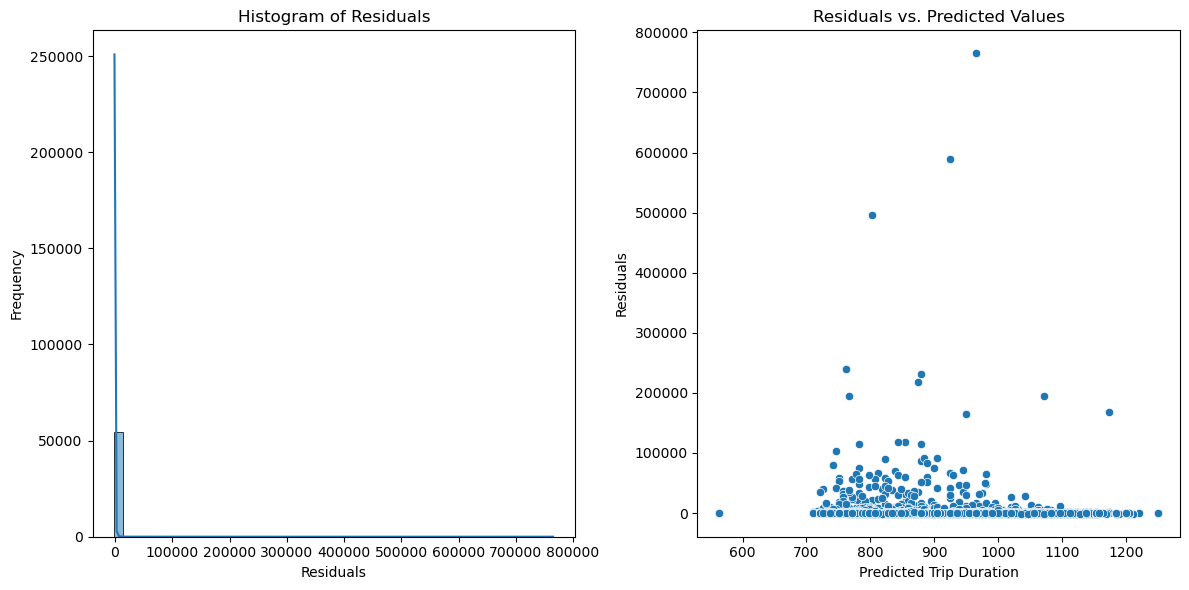

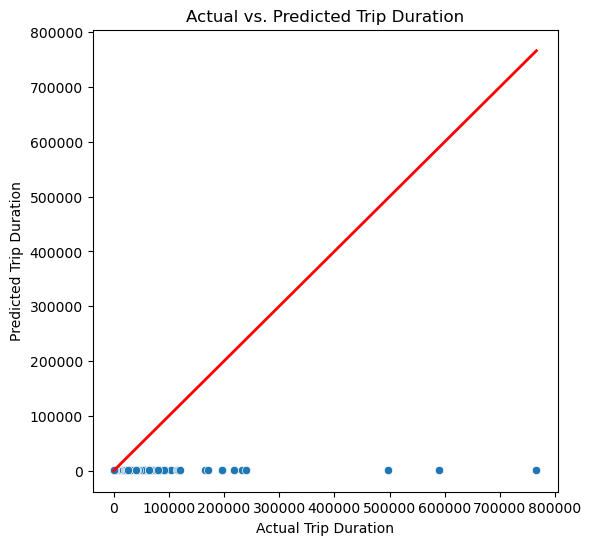

In [26]:
# Calculating residuals for the test set
residuals = y_test - y_pred

# Plotting the histogram of residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals, bins=50, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Scatterplot of residuals vs. predicted values
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred, y=residuals)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Trip Duration')
plt.ylabel('Residuals')

# Enhancing layout
plt.tight_layout()

plt.show()

# Scatterplot of actual vs. predicted values
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs. Predicted Trip Duration')
plt.xlabel('Actual Trip Duration')
plt.ylabel('Predicted Trip Duration')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  

plt.show()


### Histogram of Residuals:
The distribution of residuals appears to be highly skewed, with a concentration of values around zero but with a long tail extending to the right. This indicates that for many observations, the model's predictions are close to the actual values, but there are also quite a few instances where the model significantly underestimates the trip duration.
### Scatterplot of Residuals vs. Predicted Values:
Ideally, this plot should show a random scatter of points with no discernible pattern. However, the plot reveals a funnel-like shape, widening as the predicted trip duration increases. This suggests that the model is more likely to make larger errors (both underestimations and overestimations) as the trip duration increases. It indicates potential heteroscedasticity, where the variability of the residuals is not constant across all levels of the predicted values.
### Scatterplot of Actual vs. Predicted Trip Duration:
This plot compares the actual trip durations with those predicted by the model. The red line represents perfect predictions. The scatterplot shows that the model does not predict very high or very low trip durations well, as most predictions are clustered in a narrow band. This clustering implies that the model tends to predict average trip durations for most cases, regardless of the actual duration.
